## Inference on Normally Distributed Data

we try to infer the mu and tau of the distribution from the data

In [15]:
N <- 1000
x <- rnorm(N,0,5)

In [16]:
write.table(x,file = 'example01.data',row.names = FALSE , col.names = FALSE)

In [17]:
cat("
 model{
   for (i in 1:N){
      x[i] ~ dnorm(mu,tau)
   }
   mu ~ dnorm(0,0.0001)
   tau <- pow(sigma,-2)
   sigma ~ dunif (0,100)
 }

",file = "example01.model")

In [1]:
library('rjags')

jags <- jags.model('example01.model',data = list('x' = x, 'N' = N, n.chains =4, n.adapt = 100))

update(jags,100)

jags.samples(jags,c('mu','tau'),1000,type = 'trace')

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


ERROR: Error in jags.model("example01.model", data = list(x = x, N = N, n.chains = 4, : object 'x' not found


In [8]:
help(jags.samples)

## basic linear regression

perform a simple linear regression 

In [72]:
N <-1000
x <- 1:N
epsilon <- rnorm(N,0,1)

y<- x+ epsilon

write.table(data.frame(X = x,Y = y,Epsilon = epsilon),
           file ='example02.data',
           row.names = FALSE,
           col.names = TRUE)



In [73]:
cat ("
   model {
        for (i in 1:N){
            y[i] ~ dnorm(y.hat[i],tau)
            y.hat[i] <- a + b*x[i]
        }
        a ~ dnorm(0,0.001)
        b ~ dnorm(0,0.001)
        tau <- pow(sigma,-2)
        sigma ~ dunif(0,100)
   }

",file = "example02.model")

In [75]:
library('rjags')

jags <- jags.model('example02.model',data = list('x'=x,'y'=y,'N'=N),n.chains = 4,n.adapt = 100)
update(jags,1000)

sp = jags.samples(jags,c('a','b'),1000)
mean(sp$b)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1000
   Unobserved stochastic nodes: 3
   Total graph size: 4013

Initializing model



[1] 0.999907

In [94]:
jags <- jags.model('example02.model',data = list('x'=x,'N'=N,'a'=mean(sp$a),'b'=mean(sp$b)),n.chains = 1,n.adapt = 100)
# update(jags,1000)

pre = jags.samples(jags,c('y'),100,type = 'mean')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 1001
   Total graph size: 4013

Initializing model



[1]  1.901806  3.832715  9.269496  6.569063 16.592263 14.703504

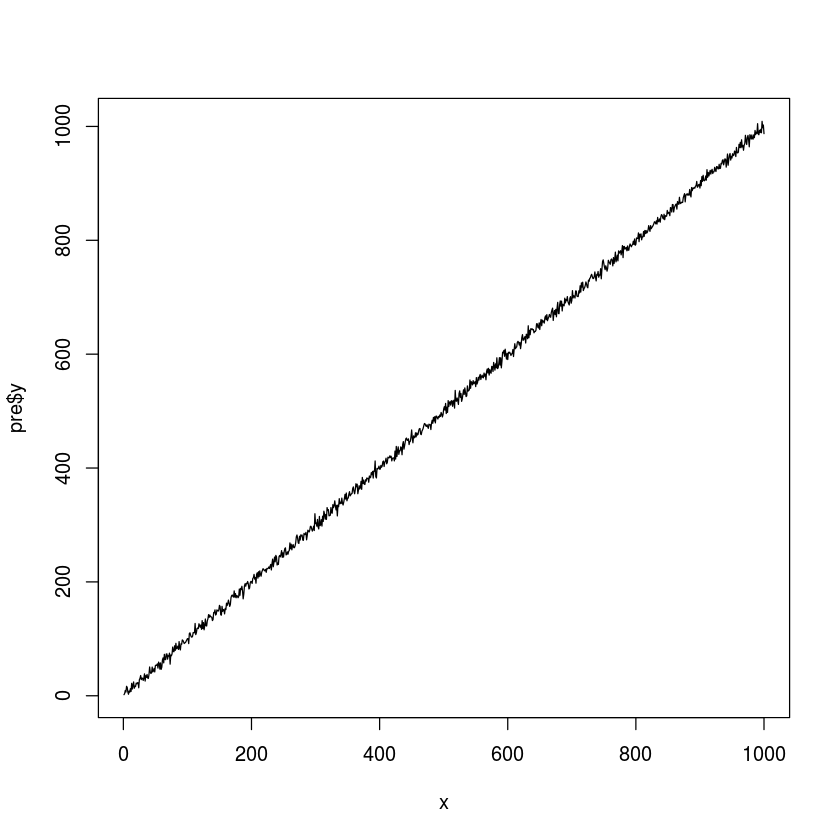

In [96]:
# dim(pre$y)
plot(x,pre$y,type='l')

# head(pre$y)

## one dimensional logistic regression


In [79]:
N <- 1000
x <- 1:N
z <- 0.01*x -5
y <- sapply(1/(1+exp(-z)),function(p){rbinom(1,1,p)})
write.table(data.frame(X=x,Y=y,Z=z),file='example03.data',col.names = TRUE,row.names = FALSE)

head(y,100)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [80]:
cat ("
model {
    for (i in 1:N){
            y[i] ~ dbern(p[i])
            p[i] <- 1/(1+exp(-z[i]))
            z[i] <- a+b*x[i]
        }
    a ~ dnorm(0,0.001)
    b ~ dnorm(0,0.001)
}
",file='example03.model')

In [81]:

jags <- jags.model('example03.model',data=list('x'=x,'y'=y,'N'=N),n.chains = 4,n.adapt = 100)
update(jags,1000)
sp=jags.samples(jags,c('a','b'),1000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1000
   Unobserved stochastic nodes: 2
   Total graph size: 10007

Initializing model



In [46]:
mean(sp$a)

[1] -4.855822

In [47]:
jags <- jags.model('example03.model',data=list('x'=x,'a'=mean(sp$a),'b'=mean(sp$b),'N'=N),n.chains = 1)
# update(jags,1000)
pre=jags.samples(jags,c('y'),1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 1000
   Total graph size: 10007

Initializing model



In [64]:
# head(pre$y,200)

In [62]:
rbinom(1,1,0.6)

[1] 0